# Lab 5: Using filters to build an electrocardiograph
March 21st 2023\
Daeyoung Kim

In [1]:
%load_ext autoreload
%autoreload 2

|![Photo of the final circuit](images/final_circuit.jpg)|
|:-:|
|*Photo of the final circuit*|

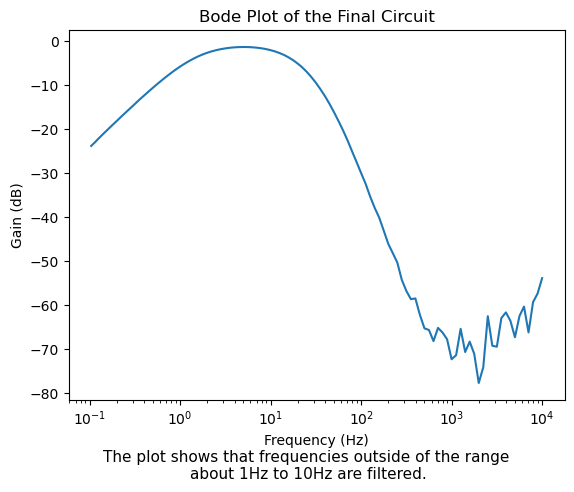

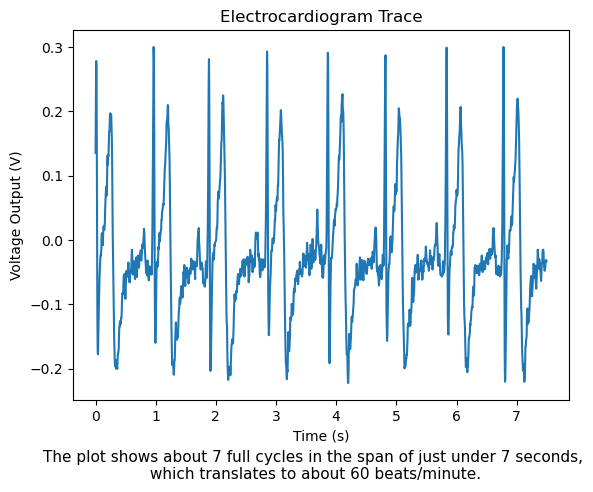

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_bode_raw = pd.read_csv("raw_data/bode.csv")
frequency = df_bode_raw["freq"].to_numpy()
gain = df_bode_raw["gain"].to_numpy()
df_ekg_heartbeat_raw = pd.read_csv("raw_data/ekg_heartbeat.csv")


plt.plot(frequency, gain)
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.title("Bode Plot of the Final Circuit")
cap_1 = "The plot shows that frequencies outside of the range \nabout 1Hz to 10Hz are filtered."
plt.figtext(0.5, -0.05, cap_1, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()

# setting the start time to 0 instead of negative time
time = np.array(df_ekg_heartbeat_raw.loc[:, "t2"] - df_ekg_heartbeat_raw.loc[0, "t2"])
voltage = np.array(df_ekg_heartbeat_raw.loc[:, "ch2"])

# plot EKG trace
plt.plot(time, voltage)
plt.xlabel("Time (s)")
plt.ylabel("Voltage Output (V)")
plt.title("Electrocardiogram Trace")
cap_2 = "The plot shows about 7 full cycles in the span of just under 7 seconds,\n which translates to about 60 beats/minute."
plt.figtext(0.5, -0.05, cap_2, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()

## The Experiment
In this experiment, there were 4 filters in the circuit with two stages of amplification. The filters were in the order of RC - CR - RC - RC with characteristic frequencies of 32Hz, 1.59Hz, 31.89Hz, and 32.48Hz, respectively. Thus, after the initial amplification with a multiplier value (G value) of 51, the RC and CR filters in series created a band pass filter between 32Hz and 1.59Hz. Then, the voltage signal went through another stage of amplification with a multiplier value (G value) of 21.4 and then second order low pass filter with a cut off frequency of about 32 Hz. This allows us to observe only the relevant signals for the electrocardiogram trace. 